## Export a pcap file to a CSV using tshark

In [1]:
!apt-get install tshark

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libc-ares2 libcap2-bin liblua5.2-0 libmaxminddb0 libnl-genl-3-200 libpam-cap
  libpcap0.8 libsbc1 libsmi2ldbl libspandsp2 libwireshark-data libwireshark11
  libwiretap8 libwscodecs2 libwsutil9 wireshark-common
Suggested packages:
  mmdb-bin snmp-mibs-downloader wireshark-doc
The following NEW packages will be installed:
  libc-ares2 libcap2-bin liblua5.2-0 libmaxminddb0 libnl-genl-3-200 libpam-cap
  libpcap0.8 libsbc1 libsmi2ldbl libspandsp2 libwireshark-data libwireshark11
  libwiretap8 libwscodecs2 libwsutil9 tshark wireshark-common
0 upgraded, 17 newly installed, 0 to remove and 20 not upgraded.
Need to get 16.5 MB of archives.
After this operation, 95.6 MB of additional disk space will be used.
Get:1 

In [2]:
!tshark -v

Running as user "root" and group "root". This could be dangerous.
TShark (Wireshark) 2.6.10 (Git v2.6.10 packaged as 2.6.10-1~ubuntu18.04.0)

Copyright 1998-2019 Gerald Combs <gerald@wireshark.org> and contributors.
License GPLv2+: GNU GPL version 2 or later <http://www.gnu.org/licenses/old-licenses/gpl-2.0.html>
This is free software; see the source for copying conditions. There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Compiled (64-bit) with libpcap, with POSIX capabilities (Linux), with libnl 3,
with GLib 2.56.4, with zlib 1.2.11, with SMI 0.4.8, with c-ares 1.14.0, with Lua
5.2.4, with GnuTLS 3.5.18, with Gcrypt 1.8.1, with MIT Kerberos, with MaxMind DB
resolver, with nghttp2 1.30.0, with LZ4, with Snappy, with libxml2 2.9.4.

Running on Linux 5.10.133+, with            Intel(R) Xeon(R) CPU @ 2.20GHz (with
SSE4.2), with 12985 MB of physical memory, with locale en_US.UTF-8, with libpcap
version 1.8.1, with GnuTLS 3.5.18, with Gcrypt 1.8.1, wi

seleccionar cantidad de frames y longitud para guardarlo en un archivo llamado **frame.len**

In [29]:
!tshark -n -r 'PCAP01.pcapng' -T fields -Eheader=y -e frame.number -e frame.len > frame.len

Running as user "root" and group "root". This could be dangerous.


In [30]:
import pandas as pd
import datetime
import subprocess
from matplotlib import pyplot as plt

In [46]:
df = pd.read_table('frame.len')
df.head()

,frame.number,frame.len
0,1,1434
1,2,1434
2,3,1434
3,4,1434
4,5,1434


In [47]:
df['frame.len'].describe()

count    9515.000000
mean      523.113925
std       608.657104
min        42.000000
25%        66.000000
50%        90.000000
75%      1383.000000
max      1506.000000
Name: frame.len, dtype: float64

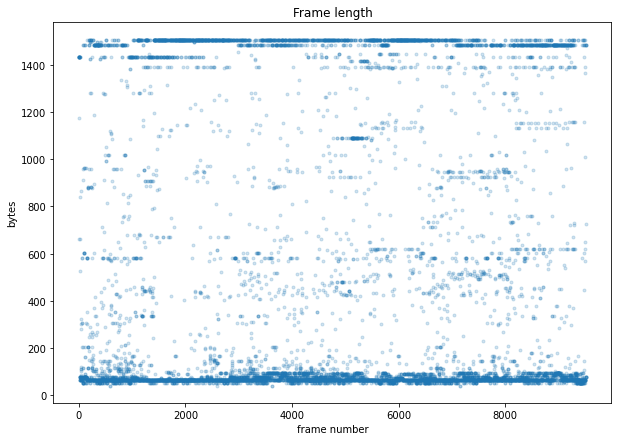

In [56]:
plt.figure(figsize=(10,7))
df["frame.len"].plot(style=".", alpha=0.2,title="Frame length",ylabel="bytes", xlabel="frame number")

In [58]:
 !tshark -r 'PCAP01.pcapng' -T fields -E header=y -E separator=, -E quote=d -E occurrence=f -e ip.version -e ip.hdr_len -e ip.tos -e ip.id -e ip.flags -e ip.flags.rb -e ip.flags.df -e ip.flags.mf -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e ip.len -e ip.dsfield -e tcp.port -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.len -e tcp.hdr_len -e tcp.flags -e tcp.flags.fin -e tcp.flags.syn -e tcp.flags.reset -e tcp.flags.push -e tcp.flags.ack -e tcp.flags.urg -e tcp.flags.cwr -e tcp.window_size -e tcp.checksum -e tcp.urgent_pointer -e tcp.options.mss_val -e udp.port -e _ws.col.Protocol -e _ws.col.Info -e dns.qry.name -e dns.resp.type > output.csv

Running as user "root" and group "root". This could be dangerous.


In [59]:
df = pd.read_csv('output.csv',on_bad_lines='skip')
df.head()

,ip.version,ip.hdr_len,ip.tos,ip.id,ip.flags,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,...,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val,udp.port,_ws.col.Protocol,_ws.col.Info,dns.qry.name,dns.resp.type
0,4.0,20.0,NaN,0x00000000,0x00004000,0.0,1.0,0.0,0.0,64.0,...,0.0,4096.0,0x0000abb9,0.0,NaN,NaN,TLSv1.2,Application Data,NaN,NaN
1,4.0,20.0,NaN,0x00000000,0x00004000,0.0,1.0,0.0,0.0,64.0,...,0.0,4096.0,0x00005279,0.0,NaN,NaN,TCP,53678 → 443 [ACK] Seq=1369 Ack=1 Win=4096 Len=...,NaN,NaN
2,4.0,20.0,NaN,0x00000000,0x00004000,0.0,1.0,0.0,0.0,64.0,...,0.0,4096.0,0x0000f14f,0.0,NaN,NaN,TCP,53678 → 443 [ACK] Seq=2737 Ack=1 Win=4096 Len=...,NaN,NaN
3,4.0,20.0,NaN,0x00000000,0x00004000,0.0,1.0,0.0,0.0,64.0,...,0.0,4096.0,0x00004174,0.0,NaN,NaN,TCP,53678 → 443 [ACK] Seq=4105 Ack=1 Win=4096 Len=...,NaN,NaN
4,4.0,20.0,NaN,0x00000000,0x00004000,0.0,1.0,0.0,0.0,64.0,...,0.0,4096.0,0x0000185e,0.0,NaN,NaN,TCP,53678 → 443 [ACK] Seq=5473 Ack=1 Win=4096 Len=...,NaN,NaN


1. ¿Qué protocolo se utilizó en el puerto 3942?

In [60]:
df[(df['tcp.port']==3942) | (df['udp.port']==3942)][['_ws.col.Protocol','_ws.col.Info']]

,_ws.col.Protocol,_ws.col.Info
2588,SSDP,M-SEARCH * HTTP/1.1
2589,SSDP,M-SEARCH * HTTP/1.1
2591,SSDP,M-SEARCH * HTTP/1.1
2592,SSDP,M-SEARCH * HTTP/1.1
2593,SSDP,M-SEARCH * HTTP/1.1


como podemos ver el protocolo utilizado es SSDP (Simple Service Discovery Protocol).

2. ¿Cúal es la direccion IP del host al que se le hizo ping dos veces?

In [61]:
df[(df['_ws.col.Protocol']=='ICMP')][['ip.src','ip.dst','_ws.col.Info']]

,ip.src,ip.dst,_ws.col.Info
126,192.168.1.7,8.8.8.8,Destination unreachable (Port unreachable)
127,192.168.1.7,8.8.8.8,Destination unreachable (Port unreachable)
1626,192.168.1.7,8.8.4.4,"Echo (ping) request id=0x4728, seq=0/0, ttl=64"
1659,8.8.4.4,192.168.1.7,"Echo (ping) reply id=0x4728, seq=0/0, ttl=5..."
1665,192.168.1.7,8.8.4.4,"Echo (ping) request id=0x4728, seq=1/256, ttl=64"
1702,8.8.4.4,192.168.1.7,"Echo (ping) reply id=0x4728, seq=1/256, ttl..."


vemos que la ip 192.168.1.7 hizo 2 solicitudes de ping hacia al 8.8.4.4.

3. ¿Cuántos paquetes de respuesta a la consulta DNS se han capturado?

In [62]:
df[df['dns.resp.type'].notnull()].count()

ip.version             99
ip.hdr_len             99
ip.tos                  0
ip.id                  99
ip.flags               99
ip.flags.rb            99
ip.flags.df            99
ip.flags.mf            99
ip.frag_offset         99
ip.ttl                 99
ip.proto               99
ip.checksum            99
ip.src                 99
ip.dst                 99
ip.len                 99
ip.dsfield             99
tcp.port                0
tcp.srcport             0
tcp.dstport             0
tcp.seq                 0
tcp.ack                 0
tcp.len                 0
tcp.hdr_len             0
tcp.flags               0
tcp.flags.fin           0
tcp.flags.syn           0
tcp.flags.reset         0
tcp.flags.push          0
tcp.flags.ack           0
tcp.flags.urg           0
tcp.flags.cwr           0
tcp.window_size         0
tcp.checksum            0
tcp.urgent_pointer      0
tcp.options.mss_val     0
udp.port               99
_ws.col.Protocol       99
_ws.col.Info           99
dns.qry.name

podemos ver que hay 99 paquetes de respuesta DNS

4. ¿Cuál es la dirección IP del host que ha enviado el mayor numero de bytes?

In [63]:
df.groupby(by='ip.src').count().sort_values('_ws.col.Protocol',ascending=False)['_ws.col.Protocol'].head(3)

ip.src
192.168.1.7      5043
115.178.9.18     1409
216.58.199.68     356
Name: _ws.col.Protocol, dtype: int64

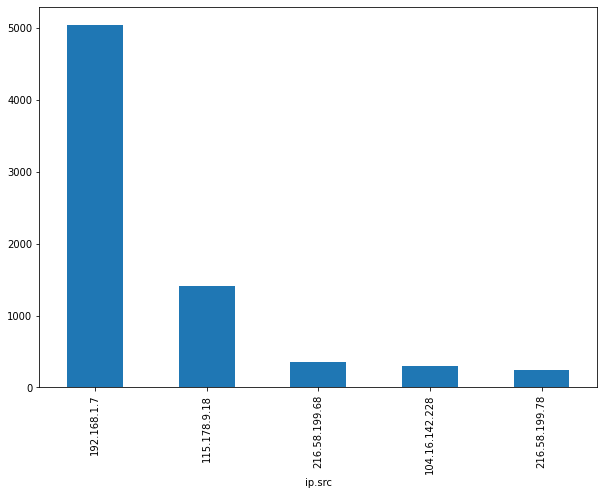

In [67]:
plt.figure(figsize=(10,7))
df.groupby(by='ip.src').count().sort_values('_ws.col.Protocol',ascending=False)['_ws.col.Protocol'].head(5).plot.bar()

como podemos ver la ip que ha enviado mas paquetes es la 192.168.1.7